In [1]:
import sys, os
sys.path.append(os.path.abspath("D:/projects-312/dynamodelx/src"))

In [2]:
from dynamodelx import BnnRegressor
from dynamodelx.plots import draw_plots
from sklearn.datasets import fetch_california_housing
from sklearn.datasets import make_regression

In [15]:
data = fetch_california_housing()
X, y = data.data, data.target

In [20]:
bnn = BnnRegressor(
    model_size='small',
    input_dim=X.shape[1],
    output_dim = 1,
    device = 'cuda',
    hidden_activation = 'gelu',
    optimizer = 'adam',
    mc_samples = 20,
    custom_architecture = None,
    return_metrics = True,
    auto_build = True
)

Model Configuration:

  Model Size:         small
  Input Dimension:    8
  Output Dimension:   1
  Loss                Negative ELBO Loss
  Device:             cuda
  Hidden Activation:  gelu
  Optimizer:          adam
  Custom Architecture:None

Building the model ...

        Model Summary (BNN)         
Layer (name)                   Shape                Param #   
--------------------------------------------------------------
weight_mu.0                    (64, 8)              512       
weight_mu.1                    (32, 64)             2048      
weight_mu.2                    (2, 32)              64        
weight_log_var.0               (64, 8)              512       
weight_log_var.1               (32, 64)             2048      
weight_log_var.2               (2, 32)              64        
bias_mu.0                      (64,)                64        
bias_mu.1                      (32,)                32        
bias_mu.2                      (2,)                 2        

In [21]:
performance = bnn.train(X=X, y=y, epochs=50, learning_rate = 0.01, momentum=None, val_size=0.2, test_size=0.1, batch_size=120)

Average train loss per sample : 0.64 
Average validation loss per sample : 0.56
Average Test Loss: 0.51

   PICP & MPIW across confidence levels on test data
   10% → PICP: 0.1066 │ MPIW: 0.1297
   20% → PICP: 0.2253 │ MPIW: 0.2614
   30% → PICP: 0.3411 │ MPIW: 0.3976
   40% → PICP: 0.4797 │ MPIW: 0.5411
   50% → PICP: 0.5853 │ MPIW: 0.6960
   60% → PICP: 0.6904 │ MPIW: 0.8685
   70% → PICP: 0.7907 │ MPIW: 1.0695
   80% → PICP: 0.8755 │ MPIW: 1.3224
   90% → PICP: 0.9385 │ MPIW: 1.6973
Calibration Error : 0.31


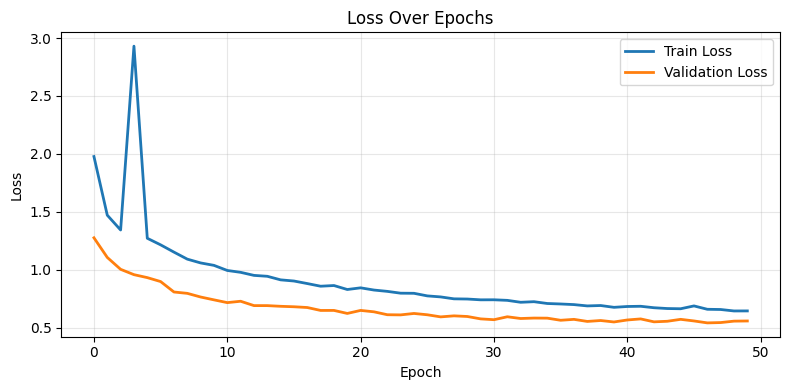

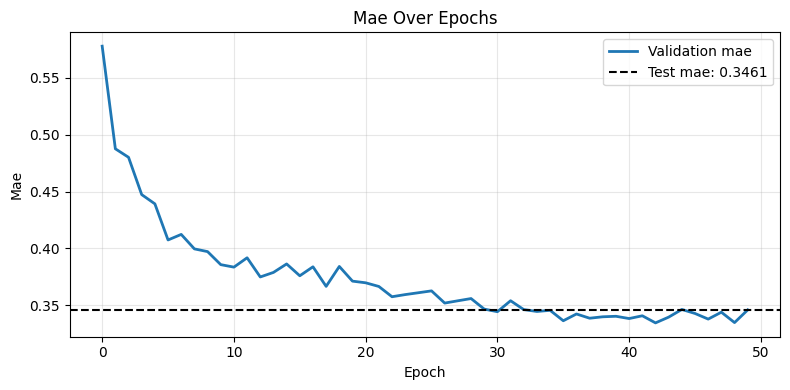

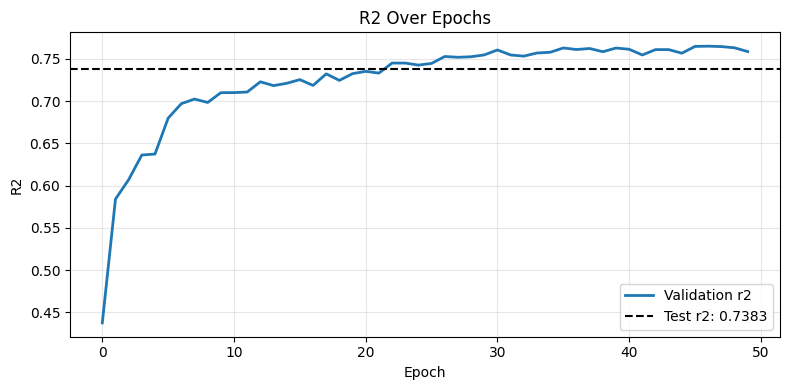

In [22]:
draw_plots(performance)

In [26]:
bnn.predict(X[:5])

(array([[4.732311 ],
        [4.486641 ],
        [4.6903815],
        [3.7471776],
        [3.0778713]], dtype=float32),
 array([[0.8372462 ],
        [0.58709705],
        [0.94794345],
        [0.75855273],
        [0.83586603]], dtype=float32))

In [27]:
bnn.save(parameters_path='california_housing_bnn.pt', arguments_path='california_housing.pt')

Model's state successfully saved to: california_housing_bnn.pt
Model's architecture successfully saved to: california_housing.pt


In [28]:
bnn = BnnRegressor.load(parameters_path='california_housing_bnn.pt', arguments_path='california_housing.pt')
bnn.predict(X[:5])

Model Configuration:

  Model Size:         small
  Input Dimension:    8
  Output Dimension:   1
  Loss                Negative ELBO Loss
  Device:             cuda
  Hidden Activation:  gelu
  Optimizer:          adam
  Custom Architecture:None

Building the model ...

        Model Summary (BNN)         
Layer (name)                   Shape                Param #   
--------------------------------------------------------------
weight_mu.0                    (64, 8)              512       
weight_mu.1                    (32, 64)             2048      
weight_mu.2                    (2, 32)              64        
weight_log_var.0               (64, 8)              512       
weight_log_var.1               (32, 64)             2048      
weight_log_var.2               (2, 32)              64        
bias_mu.0                      (64,)                64        
bias_mu.1                      (32,)                32        
bias_mu.2                      (2,)                 2        

(array([[4.6234684],
        [4.469574 ],
        [4.5807495],
        [3.6263287],
        [2.9976292]], dtype=float32),
 array([[0.7931763 ],
        [0.57055706],
        [0.9117271 ],
        [0.7186156 ],
        [0.8063929 ]], dtype=float32))